**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 04/03/2025**

**Time: 11:00 AM**

# **Perceptron**

1. Implement a Perceptron for OR Gate. How many iterations does it take to learn the
dataset? (https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-perceptron-algorithm-b0275375fea1)
2. Implement a Perceptron for AND Gate. How many iterations does it take to learn
the dataset? (https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-perceptron-algorithm-b0275375fea1)
3. Evaluate Perceptron on a Linearly Inseparable Dataset (XOR Problem). Explain
what the problem is with the dataset. Why the current rule does not apply to this
kind of data? What's your solution to this problem?
4. Exploratory problem: Using perceptron to build a linear regression classifier. (https://www.analyticsvidhya.com/blog/2021/11/a-comprehensive-guide-to-linear-regression-with-pytorch/)

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch

**1. Implement a Perceptron for OR Gate. How many iterations does it take to learn the
dataset?**

In [ ]:
# Define the OR gate inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 1])

# Initialize weights and bias
weights = np.array([1.0, 1.0])
bias = -1.0
learning_rate = 0.1

# Training loop
iterations = 0
while True:
    iterations += 1
    errors = 0
    for i in range(len(inputs)):
        # Calculate the weighted sum
        weighted_sum = np.dot(inputs[i], weights) + bias
        # Apply the activation function (step function)
        prediction = 1 if weighted_sum > 0 else 0

        # Update weights and bias if prediction is incorrect
        if prediction != outputs[i]:
            errors += 1
            weights += learning_rate * (outputs[i] - prediction) * inputs[i]
            bias += learning_rate * (outputs[i] - prediction)

    # Check if all predictions are correct
    if errors == 0:
        break

print("Weights:", weights)
print("Bias:", bias)
print("Iterations to learn:", iterations)

Weights: [1.  1.1]
Bias: -0.9
Iterations to learn: 2


In [ ]:
# prompt: Add predictions in above

# Predictions for OR gate
for i in range(len(inputs)):
    weighted_sum = np.dot(inputs[i], weights) + bias
    prediction = 1 if weighted_sum > 0 else 0
    print(f"Input: {inputs[i]}, Predicted Output: {prediction}, Actual Output: {outputs[i]}")


**2. Implement a Perceptron for AND Gate. How many iterations does it take to learn the dataset?**

In [ ]:
# Define the AND gate inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 0, 0, 1])

# Initialize weights and bias
weights = np.array([1.0, 1.0])
bias = -1
learning_rate = 0.1

# Training loop
iterations = 0
while True:
    iterations += 1
    errors = 0
    for i in range(len(inputs)):
        # Calculate the weighted sum
        weighted_sum = np.dot(inputs[i], weights) + bias
        # Apply the activation function (step function)
        prediction = 1 if weighted_sum > 0 else 0

        # Update weights and bias if prediction is incorrect
        if prediction != outputs[i]:
            errors += 1
            weights += learning_rate * (outputs[i] - prediction) * inputs[i]
            bias += learning_rate * (outputs[i] - prediction)

    # Check if all predictions are correct
    if errors == 0:
        break

print("Weights:", weights)
print("Bias:", bias)
print("Iterations to learn:", iterations)

Weights: [1. 1.]
Bias: -1
Iterations to learn: 1


**3. Evaluate Perceptron on a Linearly Inseparable Dataset (XOR Problem). Explain what the problem is with the dataset. Why the current rule does not apply to this kind of data? What's your solution to this problem?**

In [ ]:
# Define the XOR gate inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])

# Initialize weights and bias
weights = np.array([1.0, 1.0])
bias = -1
learning_rate = 0.1

# Training loop
iterations = 0
max_iterations = 100  # Setting a maximum number of iterations to prevent infinite loops

while iterations < max_iterations:
    iterations += 1
    errors = 0
    for i in range(len(inputs)):
        # Calculate the weighted sum
        weighted_sum = np.dot(inputs[i], weights) + bias
        # Apply the activation function (step function)
        prediction = 1 if weighted_sum > 0 else 0

        # Update weights and bias if prediction is incorrect
        if prediction != outputs[i]:
            errors += 1
            weights += learning_rate * (outputs[i] - prediction) * inputs[i]
            bias += learning_rate * (outputs[i] - prediction)

    # Check if all predictions are correct
    if errors == 0:
        break

print("Weights:", weights)
print("Bias:", bias)
print("Iterations:", iterations)

if iterations == max_iterations:
    print("Perceptron failed to converge within the maximum number of iterations.")

Weights: [-1.00000000e-01  1.38777878e-16]
Bias: 0.09999999999999987
Iterations: 100
Perceptron failed to converge within the maximum number of iterations.


 **Explanation:**

 The XOR problem is linearly inseparable.  This means you can't draw a single straight line to separate the input points that produce output 0 from those that produce output 1. The Perceptron algorithm, which is based on a linear activation function, can only find linear decision boundaries.  Since XOR requires a non-linear decision boundary, the Perceptron cannot correctly classify all four data points.  It will oscillate between incorrect classifications.

 **Solution:**

 To solve the XOR problem, you need a non-linear activation function and/or multiple layers of perceptrons (a neural network).  A simple solution is to use a Multi-Layer Perceptron (MLP) with at least one hidden layer.  The hidden layer introduces non-linearity, enabling the network to learn the XOR function.  Other models like Support Vector Machines with appropriate kernels can also handle this.


**4. Exploratory problem: Using perceptron to build a linear regression classifier.**

In [ ]:
# Generate synthetic data for linear regression
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

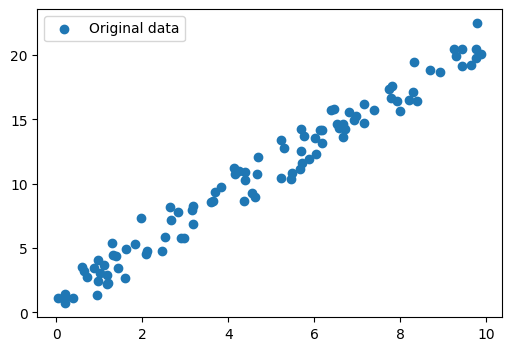

In [ ]:
# visulaize the data
plt.figure(figsize=(6,4))
plt.scatter(X, y, label='Original data')
plt.legend()
plt.show()

In [ ]:
# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
# Define the perceptron model
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Instantiate the model, loss function, and optimizer
input_dim = 1
output_dim = 1
model = Perceptron(input_dim, output_dim)

criterion = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Train the model
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.9933
Epoch [200/1000], Loss: 0.9927
Epoch [300/1000], Loss: 0.9925
Epoch [400/1000], Loss: 0.9925
Epoch [500/1000], Loss: 0.9925
Epoch [600/1000], Loss: 0.9924
Epoch [700/1000], Loss: 0.9924
Epoch [800/1000], Loss: 0.9924
Epoch [900/1000], Loss: 0.9924
Epoch [1000/1000], Loss: 0.9924


In [ ]:
# Make predictions
predicted = model(X).detach().numpy()

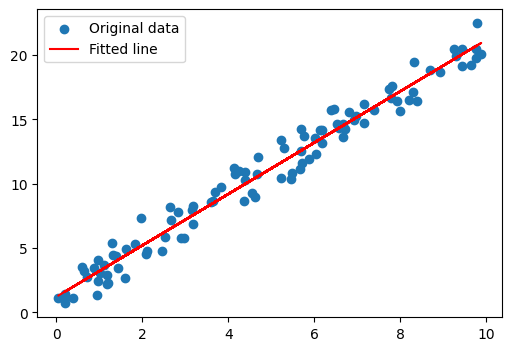

In [ ]:
# Plot the results
plt.figure(figsize=(6,4))
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted,color='red', label='Fitted line')
plt.legend()
plt.show()